# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [5]:
df

,HHPers,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,Jaar,Maand,Weekdag,Feestdag,Toer,KMotiefV,AfstR,RReisduur,RVertUur,KRvm
0,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,2018,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,7,63,15,18,1


In [6]:
print(df.columns)

Index(['HHPers', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'AfstR', 'RReisduur',
       'RVertUur', 'KRvm'],
      dtype='object')


In [7]:
new_columns= {"HHPers": "People_in_house", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive",
              "AfstR": "Distance", "RReisduur": "Duration", 'RVertUur':'Hour', "KRvm": "Mode"}

In [8]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,2018,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,2018,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,2022,12,5,0,0,7,63,15,18,1


In [9]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Year', 'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive',
       'Distance', 'Duration', 'Hour', 'Mode'],
      dtype='object')

# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorical - Nominal
3) Gender - Male / Female - Categorical - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
6) Education - Highest education completed for the respondent - Categorical - Nominal
7) Drivel_License - If the respondent has car driving license - Categorical - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorical
13) Weekday - Day that the trip occured - Categorical
14) Holiday - If the trip occured on a national holiday - Categorical - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
16) Motive - The reason of the trip - Categorial - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Hour - Hour of departure
22) Mins - Minute of departure 
23) Mode - The mode of transportation for the trip - Categorical - Target variable

In [10]:
df.isnull().any()

People_in_house    False
Gender             False
Age                False
Background         False
Education          False
Driver_license     False
Cars_in_house      False
Mopeds_in_house    False
Electric_bike      False
Year               False
Month              False
Weekday            False
Holiday            False
Round_trip         False
Motive             False
Distance           False
Duration           False
Hour               False
Mode               False
dtype: bool

In [11]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Year', 'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive',
       'Distance', 'Duration', 'Hour', 'Mode'],
      dtype='object')

In [12]:
drops = ['Year']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


In [13]:
df.duplicated().sum()

37213

In [14]:
df = df.drop_duplicates()
df.shape

(779913, 18)

In [15]:
df = df.drop_duplicates(subset=df.columns.difference(['Mode']))
df.shape

(779309, 18)

In [16]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,15,10,1
1,1,1,42,1,3,1,1,0,0,1,7,0,0,4,60,10,11,1
2,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,15,5
3,1,1,42,1,3,1,1,0,0,1,7,0,0,6,10,5,18,5
4,2,1,42,1,3,1,1,0,0,1,6,0,0,4,30,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,2,49,3,4,1,1,0,0,12,5,0,0,5,110,35,15,1
817122,3,2,49,3,4,1,1,0,0,12,5,0,0,4,11,7,16,6
817123,3,2,49,3,4,1,1,0,0,12,5,0,0,4,6,5,17,6
817124,3,2,49,3,4,1,1,0,0,12,5,0,0,7,63,15,18,1


# Encode variables to categorical so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [17]:
df['Gender'].value_counts()

Gender
2    403173
1    376136
Name: count, dtype: int64

In [18]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [19]:
df['Driver_license'].value_counts()

Driver_license
1    582422
0    196887
Name: count, dtype: int64

In [20]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [21]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Non Dutch", 3:"Non Dutch"})

In [22]:
df['Background'].value_counts()

Background
Dutch        621044
Non Dutch    158265
Name: count, dtype: int64

In [23]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [24]:
df['Education'].value_counts()

Education
Higher education       323370
Secondary              224730
Lower vocational        98185
Currently attending     85745
Primary education       24492
Other education         15903
No education             6884
Name: count, dtype: int64

In [25]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [26]:
df['Holiday'].value_counts()

Holiday
No     766610
Yes     12699
Name: count, dtype: int64

In [27]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [28]:
df['Electric_bike'].value_counts()

Electric_bike
No     550606
Yes    228703
Name: count, dtype: int64

In [29]:
df['Month'].value_counts()

Month
9     72759
11    70508
1     69677
10    69494
5     65462
3     65439
6     64584
8     62874
7     60760
12    60625
2     59214
4     57913
Name: count, dtype: int64

In [30]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [31]:
df['Weekday'].value_counts()

Weekday
6    123426
5    117659
3    115120
4    114793
2    112246
7    111703
1     84362
Name: count, dtype: int64

In [32]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [33]:
df['Round_trip'].value_counts()

Round_trip
0    680994
1     98315
Name: count, dtype: int64

In [34]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [35]:
df['Motive'].value_counts()

Motive
4    150677
7    141223
1    135259
9     82698
8     80981
6     79849
5     63903
3     25351
2     19368
Name: count, dtype: int64

In [36]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [37]:
df['Mode'].value_counts()

Mode
1    256839
5    223936
6    188503
2     81561
4     28470
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [38]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [39]:
df['Mode'].value_counts()

Mode
car                 338400
bike                223936
walk                188503
public transport     28470
Name: count, dtype: int64

In [40]:
df.shape

(779309, 18)

In [41]:
df.shape

(779309, 18)

In [42]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Distance,Duration,Hour,Mode
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,15,10,car
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,60,10,11,car
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,15,bike
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,10,5,18,bike
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,30,10,9,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Education,110,35,15,car
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,11,7,16,walk
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,6,5,17,walk
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,63,15,18,car


# Data Cleaning

In [43]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Distance,Duration,Hour
count,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000,779309.000000
mean,2.853300,42.293691,1.380415,0.207407,97.432447,24.076450,13.629871
std,1.387651,20.753990,1.001660,0.592609,199.654405,31.751656,4.254536
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,11.000000,10.000000,10.000000
50%,3.000000,42.000000,1.000000,0.000000,30.000000,15.000000,14.000000
75%,4.000000,59.000000,2.000000,0.000000,86.000000,30.000000,17.000000
max,10.000000,99.000000,10.000000,19.000000,6600.000000,993.000000,33.000000


The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [44]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [45]:
df = df.drop("Distance", axis=1)

In [46]:
df = df[(df['Hour'] <= 23)]

In [47]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000,778960.000000
mean,2.853523,42.298861,1.380578,0.207438,24.080339,13.625118,9.745598
std,1.387611,20.755240,1.001369,0.592659,31.757284,4.249525,19.968944
min,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 778960 entries, 0 to 817125
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  778960 non-null  int64  
 1   Gender           778960 non-null  object 
 2   Age              778960 non-null  int64  
 3   Background       778960 non-null  object 
 4   Education        778960 non-null  object 
 5   Driver_license   778960 non-null  object 
 6   Cars_in_house    778960 non-null  int64  
 7   Mopeds_in_house  778960 non-null  int64  
 8   Electric_bike    778960 non-null  object 
 9   Month            778960 non-null  object 
 10  Weekday          778960 non-null  object 
 11  Holiday          778960 non-null  object 
 12  Round_trip       778960 non-null  object 
 13  Motive           778960 non-null  object 
 14  Duration         778960 non-null  int64  
 15  Hour             778960 non-null  int64  
 16  Mode             778960 non-null  object 
 

We will also remove samples where Distance and Duration are 0

In [49]:
df = df[(df['Distance_in_kms'] > 0)]

In [50]:
df = df[(df['Duration'] > 0)]

In [51]:
df.shape

(778741, 18)

In [52]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000,778741.000000
mean,2.853638,42.299685,1.380596,0.207455,24.087111,13.625384,9.748339
std,1.387636,20.756257,1.001250,0.592694,31.759181,4.249481,19.971083
min,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,10.000000,10.000000,1.100000
50%,3.000000,42.000000,1.000000,0.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,30.000000,17.000000,8.600000
max,10.000000,99.000000,10.000000,19.000000,993.000000,23.000000,660.000000


In [53]:
df = df[(df['Age'] >= 18)]
df.shape

(665679, 18)

In [54]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000,665679.000000
mean,2.619838,47.520718,1.348975,0.205548,24.710153,13.631507,10.470594
std,1.293777,17.729566,0.986803,0.592456,32.248721,4.297738,20.799149
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,19.000000,960.000000,23.000000,660.000000


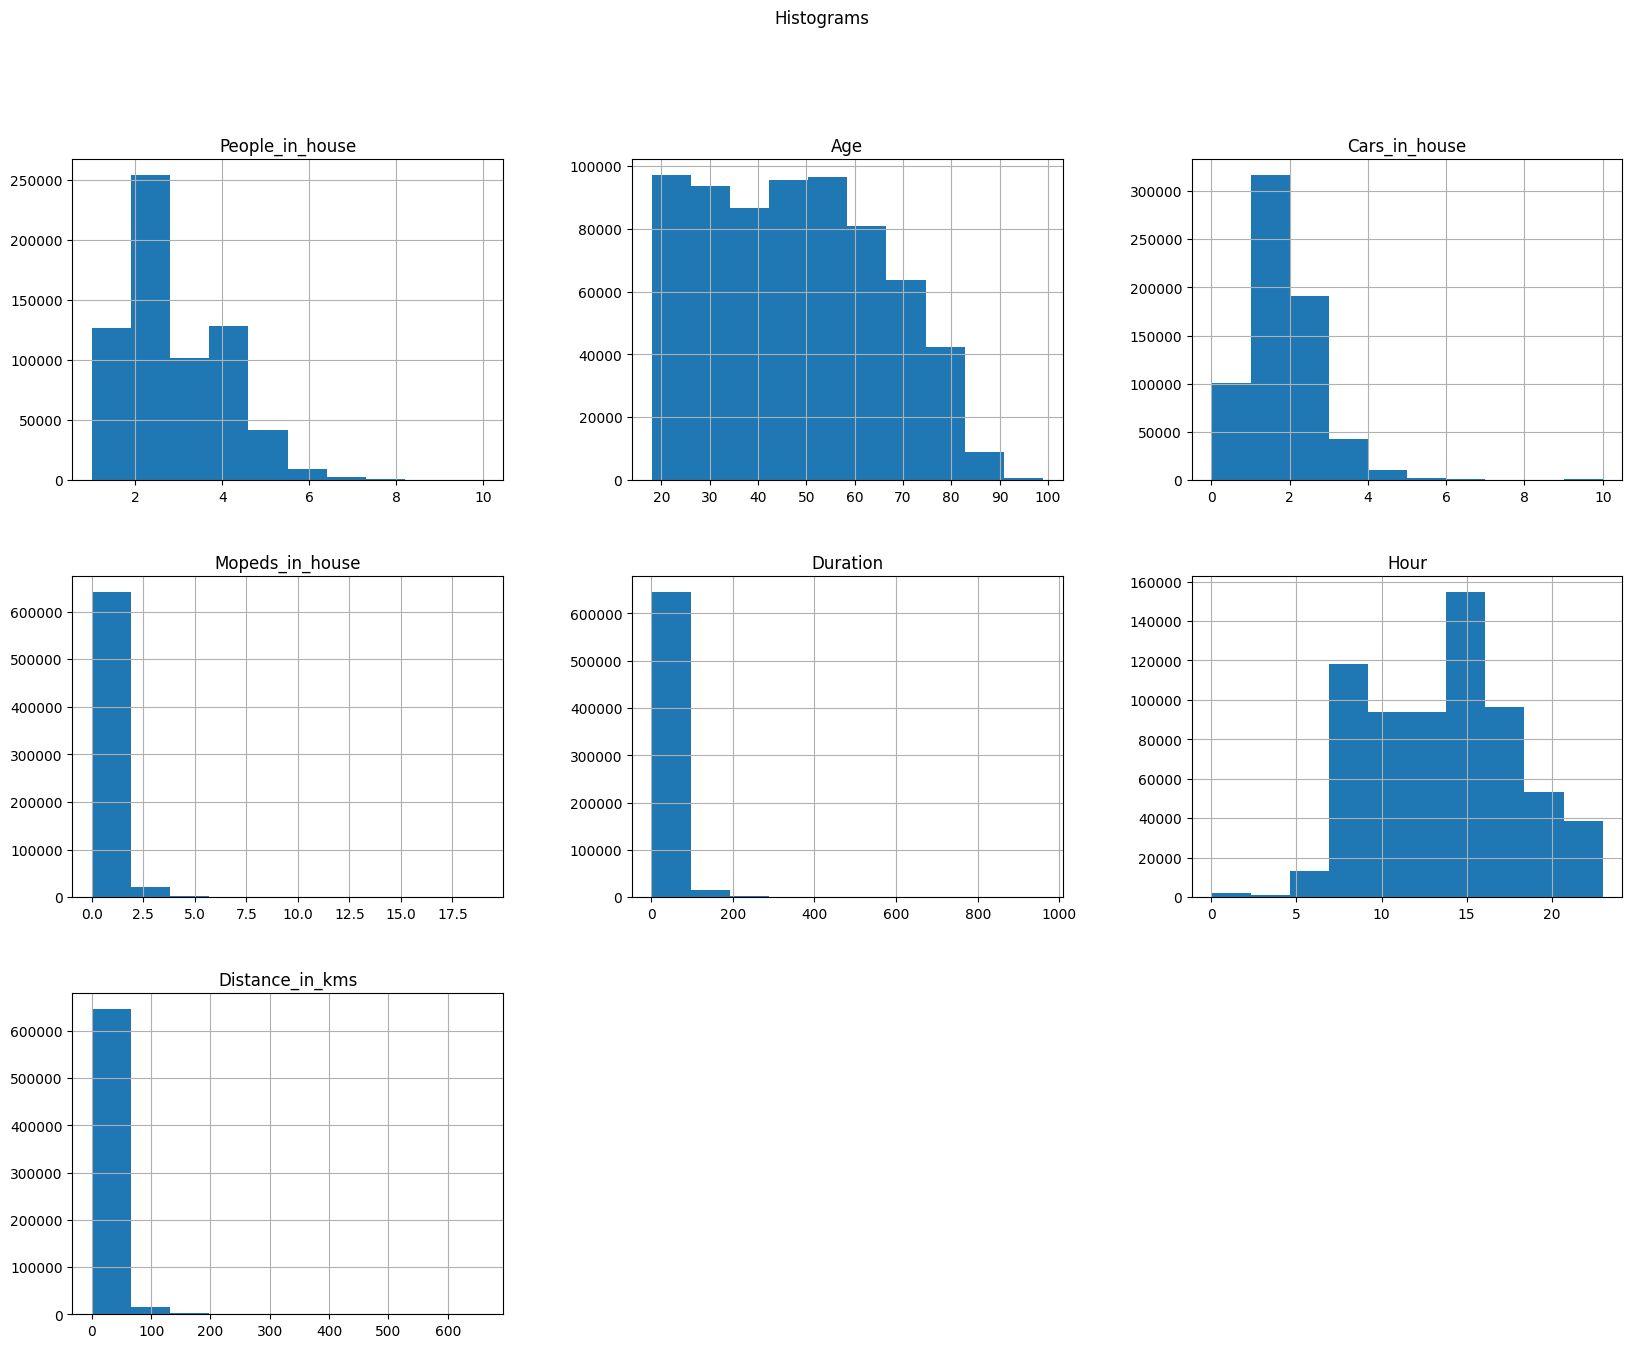

In [55]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [56]:
df = df[(df['Duration'] <= 300)]

In [57]:
df = df[(df['Distance_in_kms'] <= 200)]

In [58]:
df = df[(df['Mopeds_in_house'] <= 6)]

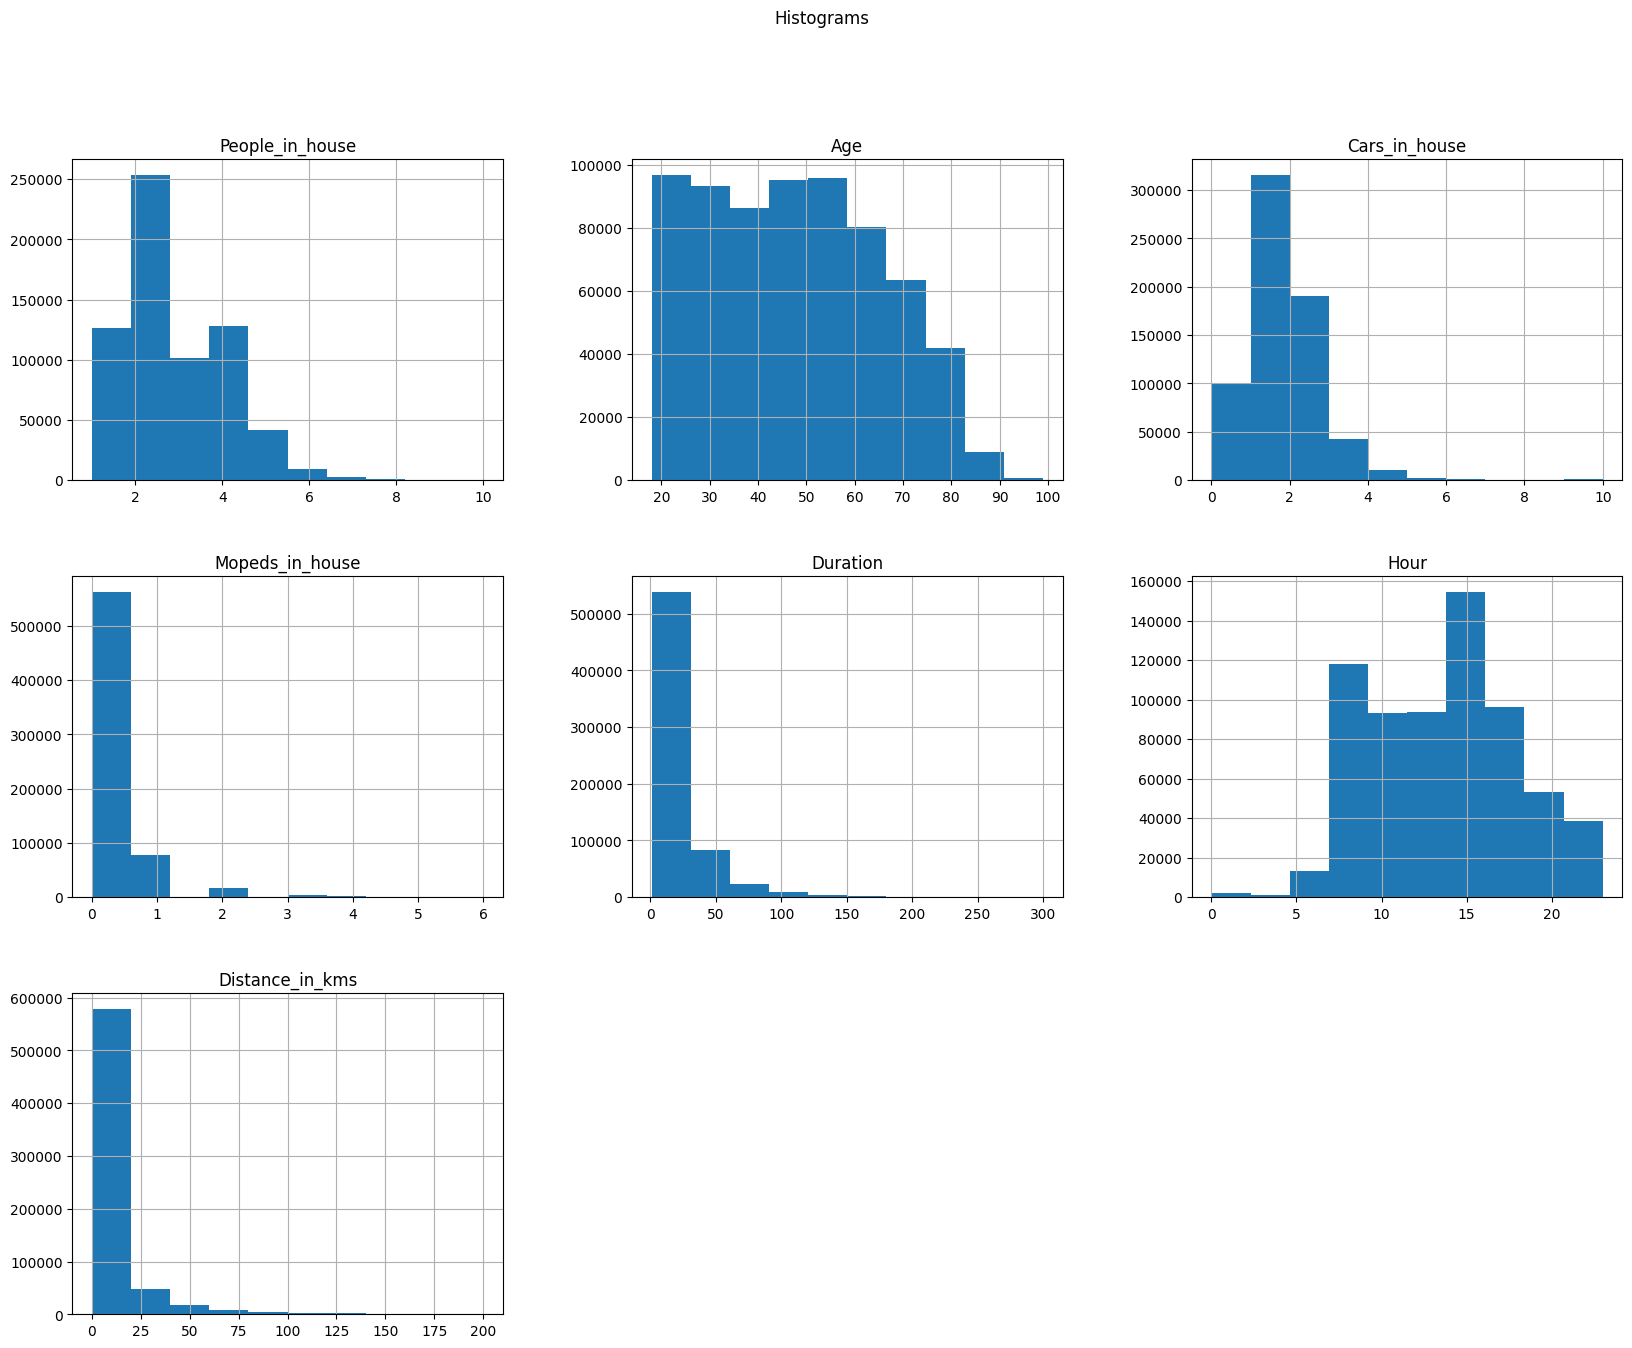

In [59]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [60]:
df.shape

(663745, 18)

In [61]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000
mean,2.620011,47.508646,1.347947,0.199550,24.033537,13.636659,10.226983
std,1.293940,17.730048,0.984690,0.543227,28.103641,4.297903,19.631087
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,300.000000,23.000000,200.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 663745 entries, 0 to 817125
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   People_in_house  663745 non-null  int64  
 1   Gender           663745 non-null  object 
 2   Age              663745 non-null  int64  
 3   Background       663745 non-null  object 
 4   Education        663745 non-null  object 
 5   Driver_license   663745 non-null  object 
 6   Cars_in_house    663745 non-null  int64  
 7   Mopeds_in_house  663745 non-null  int64  
 8   Electric_bike    663745 non-null  object 
 9   Month            663745 non-null  object 
 10  Weekday          663745 non-null  object 
 11  Holiday          663745 non-null  object 
 12  Round_trip       663745 non-null  object 
 13  Motive           663745 non-null  object 
 14  Duration         663745 non-null  int64  
 15  Hour             663745 non-null  int64  
 16  Mode             663745 non-null  object 
 

In [63]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [64]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate correlation matrix for numerical variables
numerical_corr_matrix = df[numerical_columns].corr()

# Calculate Cramér's V correlation matrix for categorical variables
categorical_corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        categorical_corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])


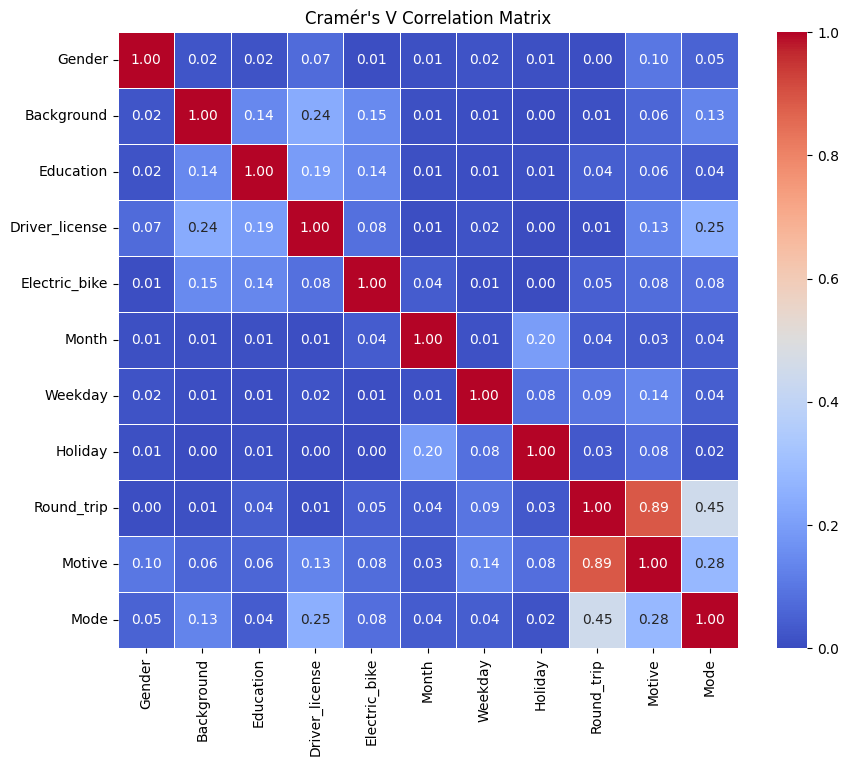

In [65]:
categorical_corr_matrix = categorical_corr_matrix.fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Cramér's V Correlation Matrix")
plt.show()

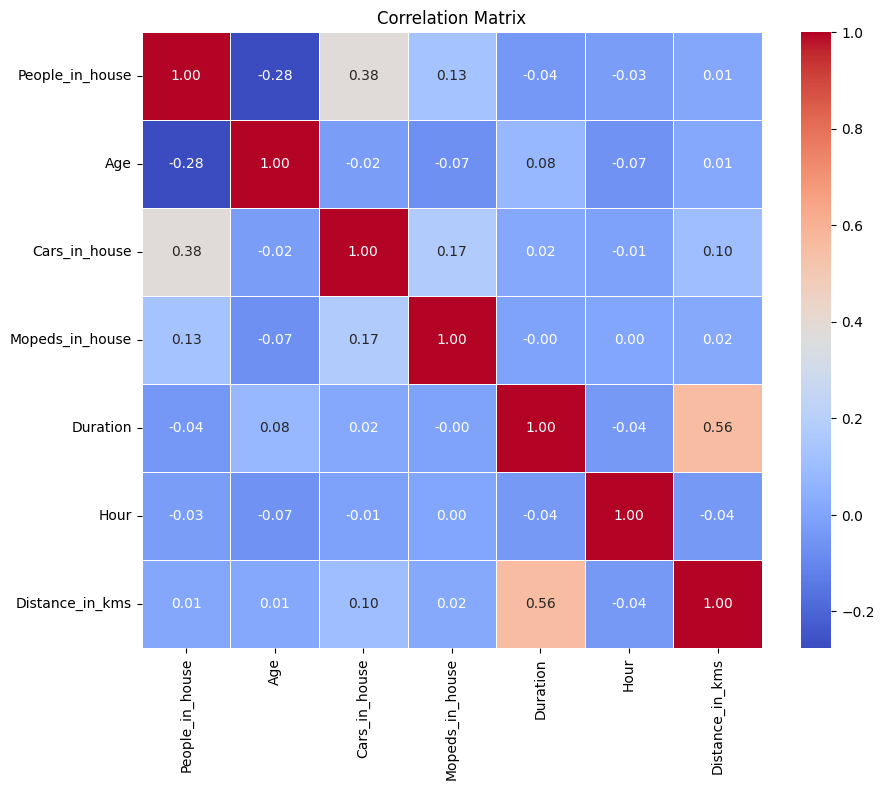

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

# Exploratory Data Analysis

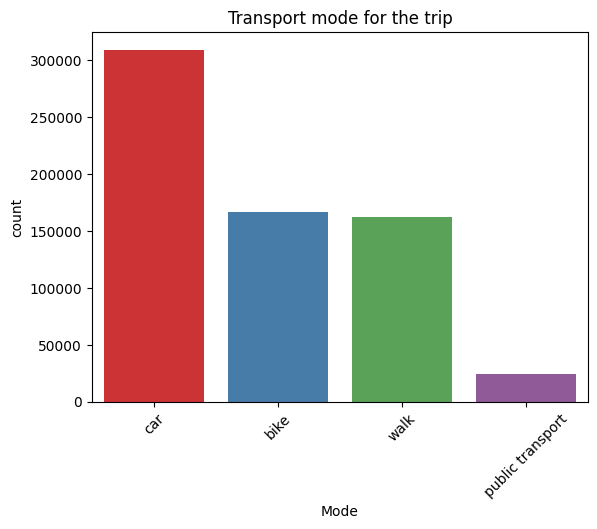

In [67]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [68]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 46.631462
bike                25.161771
walk                24.509262
public transport     3.697504
Name: proportion, dtype: float64


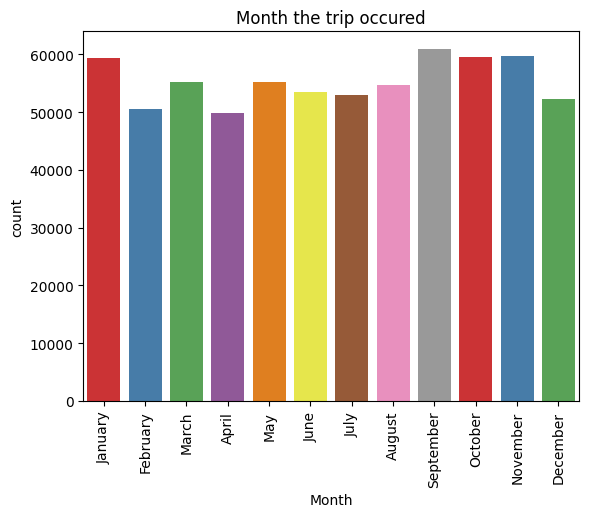

In [69]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [70]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.182141
November     8.993665
October      8.980105
January      8.936414
May          8.320967
March        8.309667
August       8.248800
June         8.055353
July         7.987857
December     7.867931
February     7.610302
April        7.506799
Name: proportion, dtype: float64


In [71]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

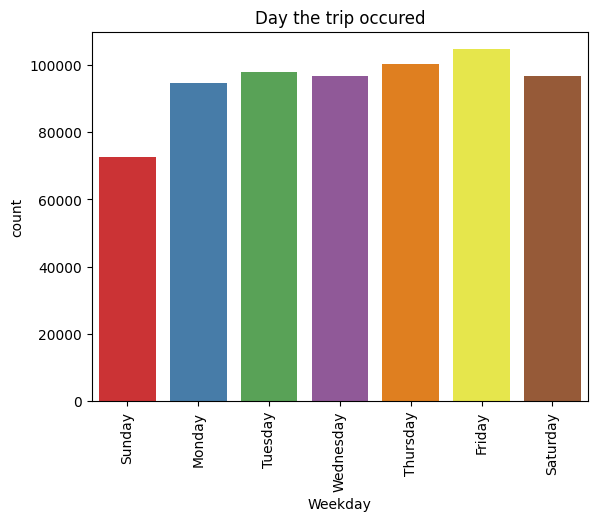

In [72]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [73]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.771569
Thursday     15.116498
Tuesday      14.736834
Saturday     14.584065
Wednesday    14.570656
Monday       14.270541
Sunday       10.949838
Name: proportion, dtype: float64


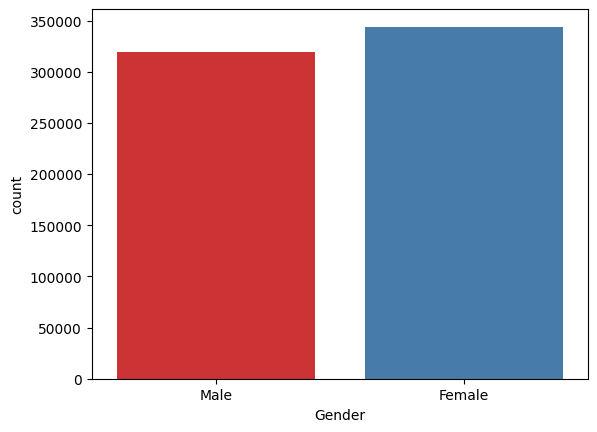

In [74]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [75]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.834213
Male      48.165787
Name: proportion, dtype: float64


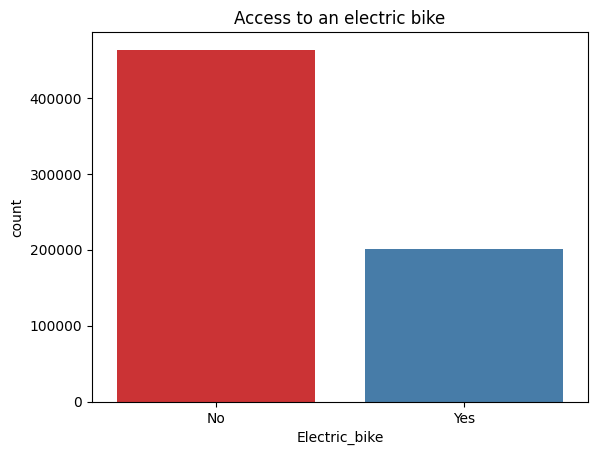

In [76]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [77]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     69.804669
Yes    30.195331
Name: proportion, dtype: float64


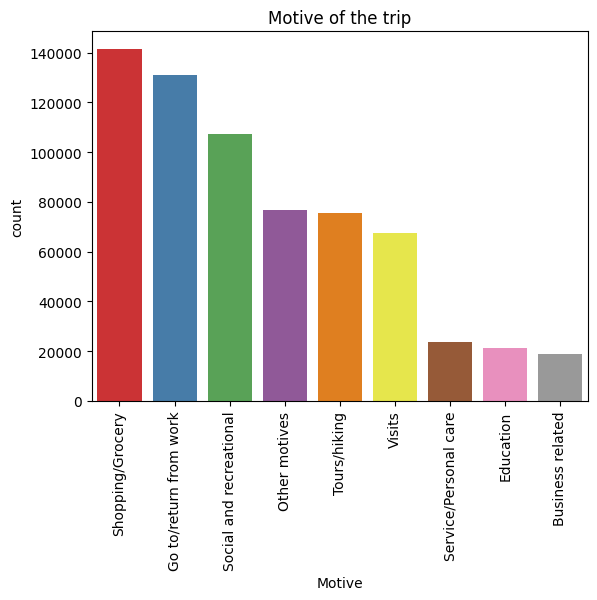

In [78]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [79]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.314963
Go to/return from work     19.751561
Social and recreational    16.179105
Other motives              11.590445
Tours/hiking               11.369728
Visits                     10.200755
Service/Personal care       3.547145
Education                   3.196710
Business related            2.849588
Name: proportion, dtype: float64


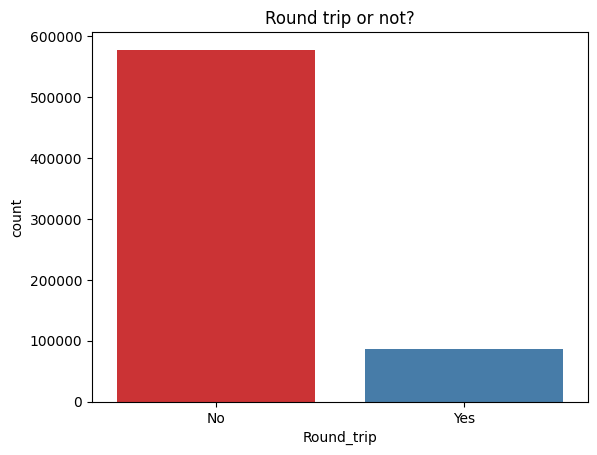

In [80]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [81]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     87.010373
Yes    12.989627
Name: proportion, dtype: float64


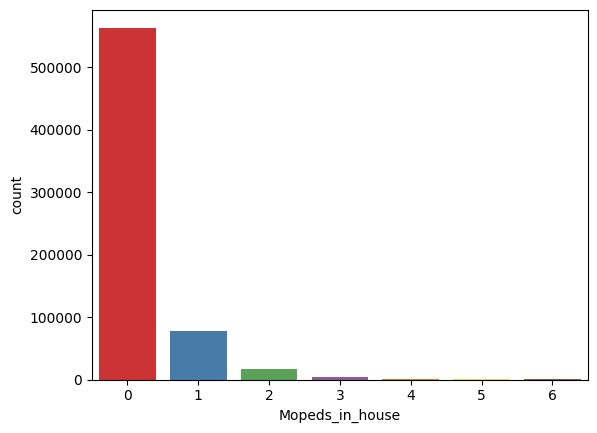

In [82]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [83]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.864519
1    11.654325
2     2.578099
3     0.606860
4     0.193297
5     0.066742
6     0.036158
Name: proportion, dtype: float64


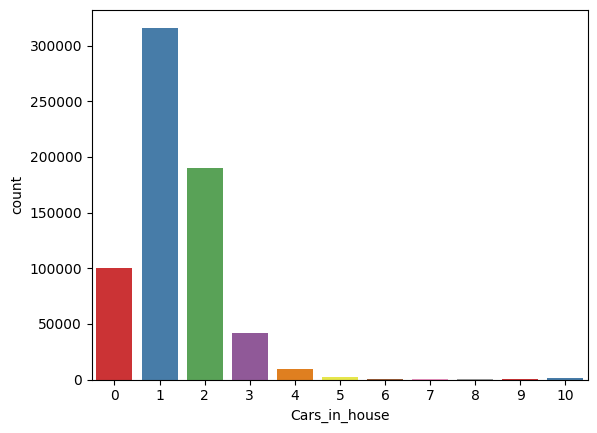

In [84]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [85]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.631093
2     28.656788
0     15.148137
3      6.340236
4      1.498618
5      0.354805
10     0.172807
6      0.115255
7      0.040678
9      0.023804
8      0.017778
Name: proportion, dtype: float64


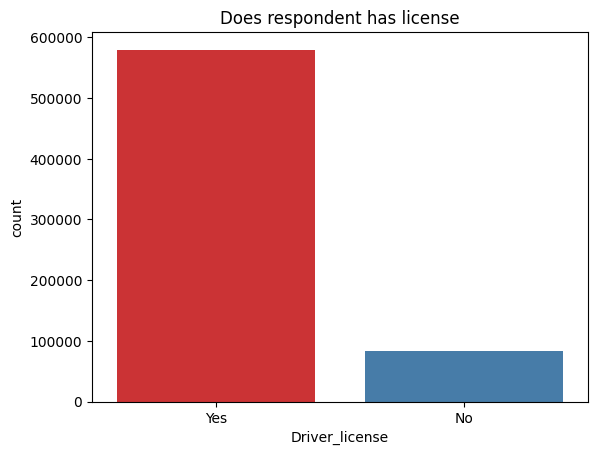

In [86]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [87]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.330375
No     12.669625
Name: proportion, dtype: float64


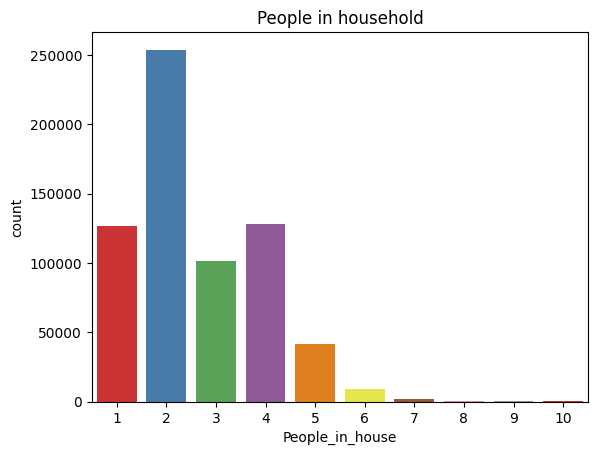

In [88]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [89]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     38.237426
4     19.311633
1     19.038938
3     15.230699
5      6.284793
6      1.402948
7      0.331905
8      0.096423
9      0.040076
10     0.025160
Name: proportion, dtype: float64


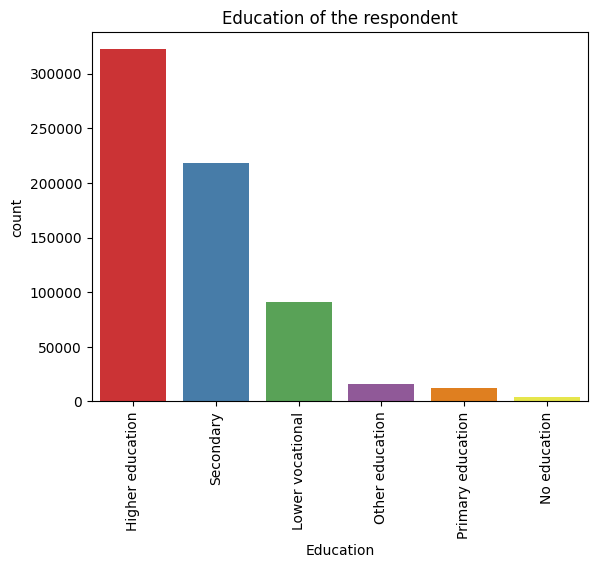

In [90]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [91]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.513812
Secondary            32.915352
Lower vocational     13.775170
Other education       2.340507
Primary education     1.792255
No education          0.662905
Name: proportion, dtype: float64


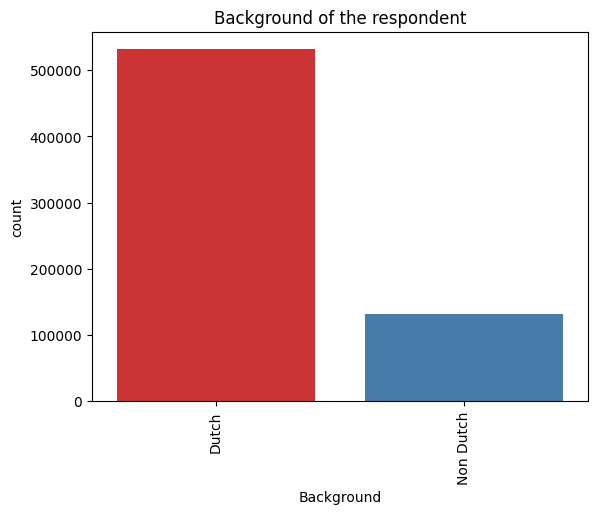

In [92]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [93]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch        80.071413
Non Dutch    19.928587
Name: proportion, dtype: float64


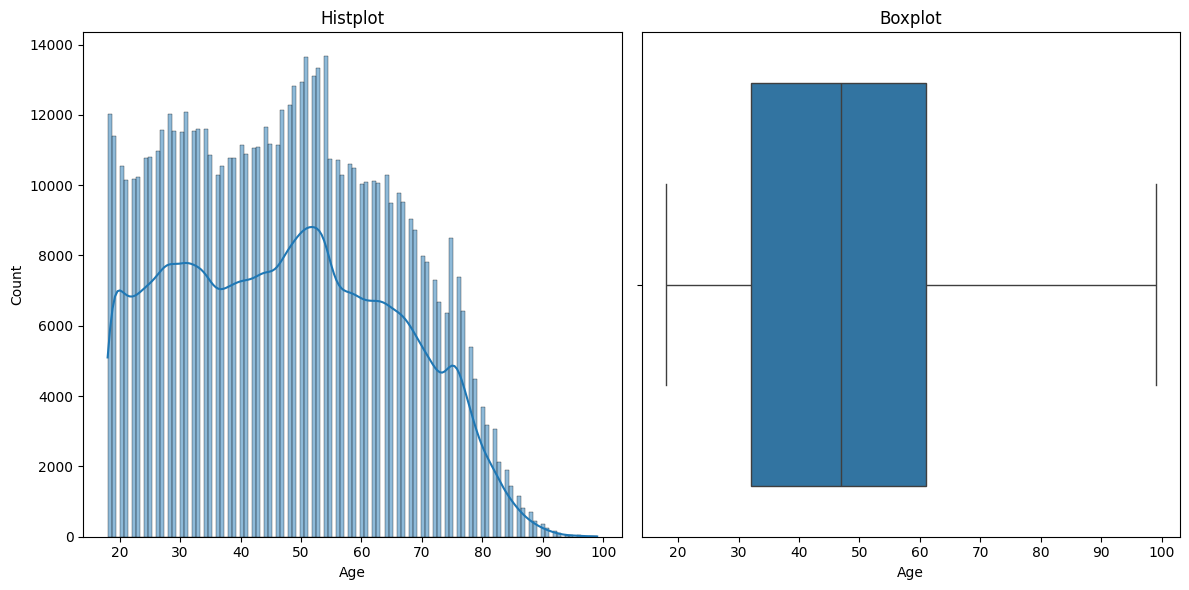

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

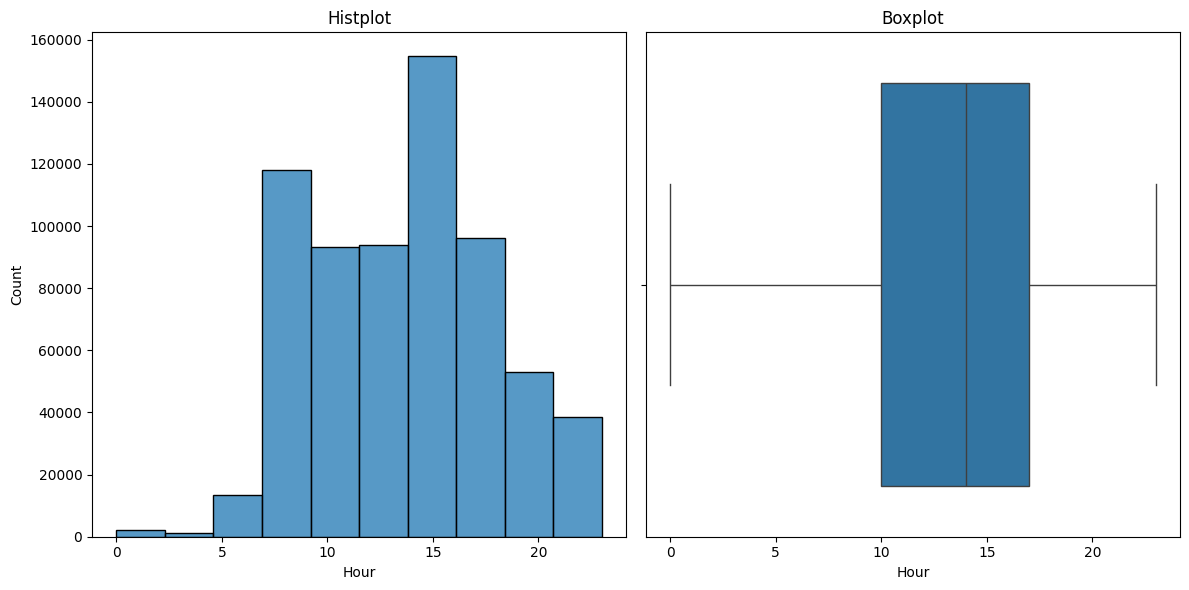

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Hour', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Hour', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

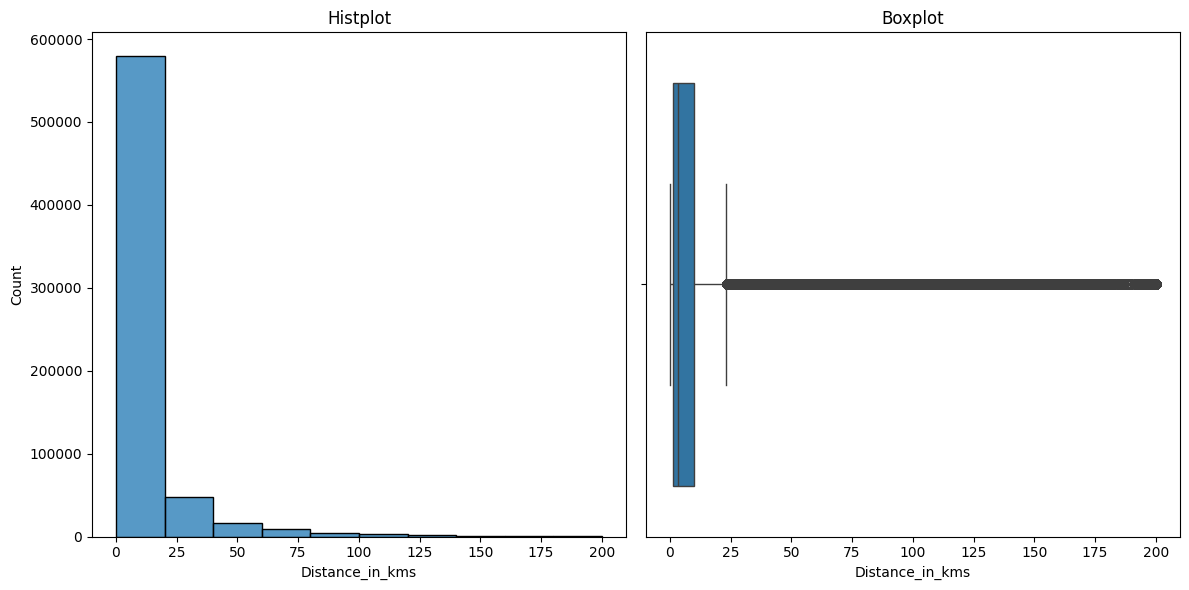

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

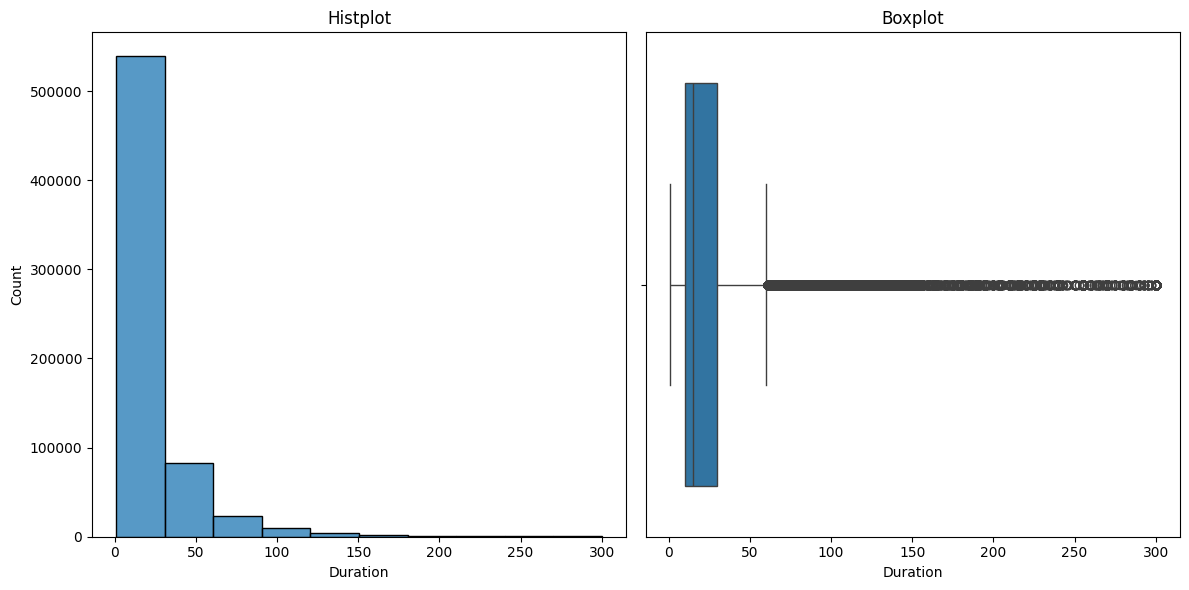

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

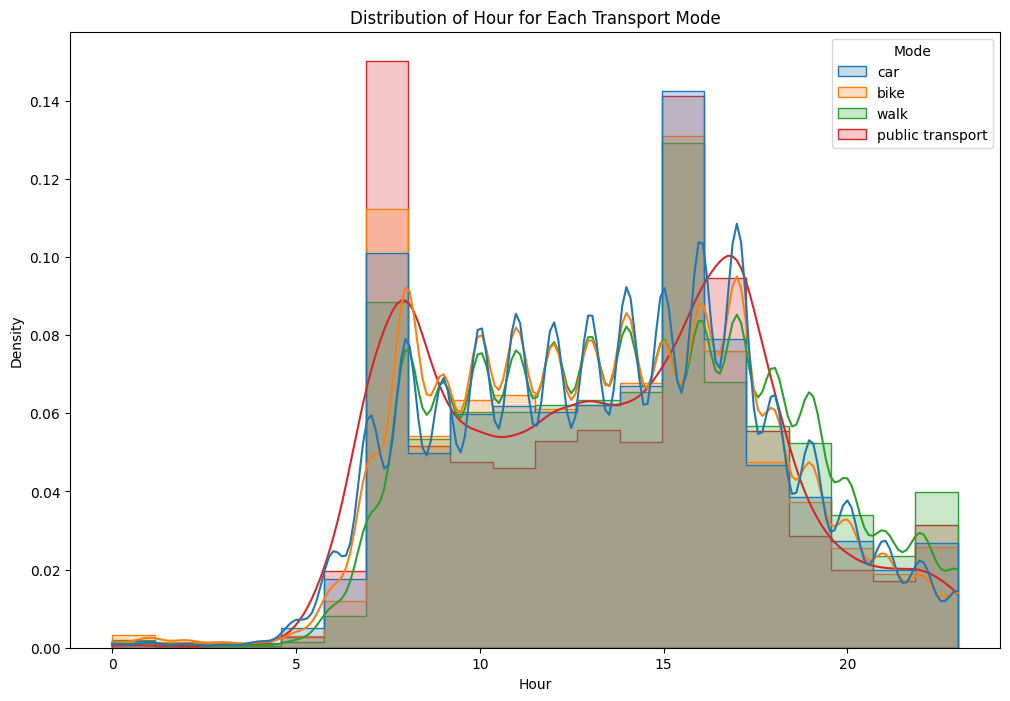

In [98]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Hour', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Hour for Each Transport Mode')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.show()

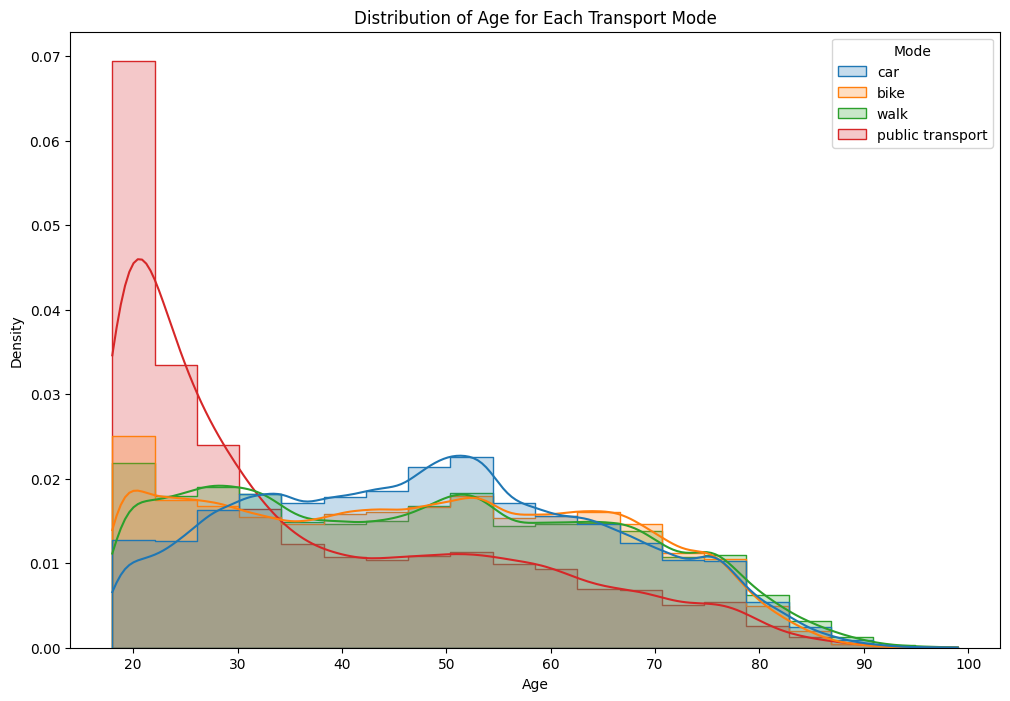

In [99]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

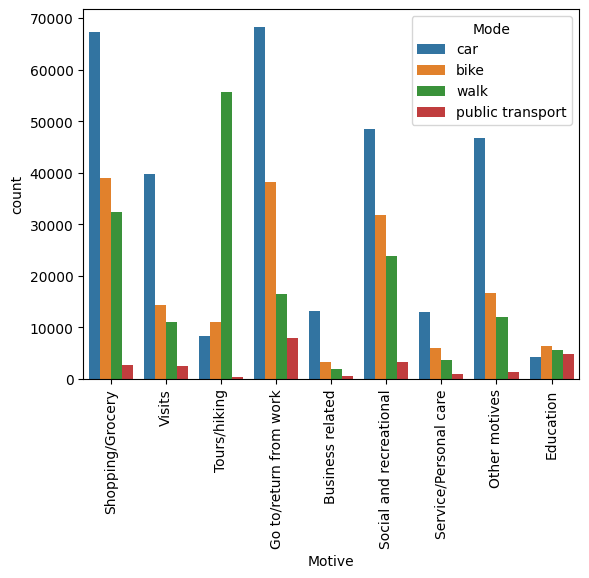

In [100]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

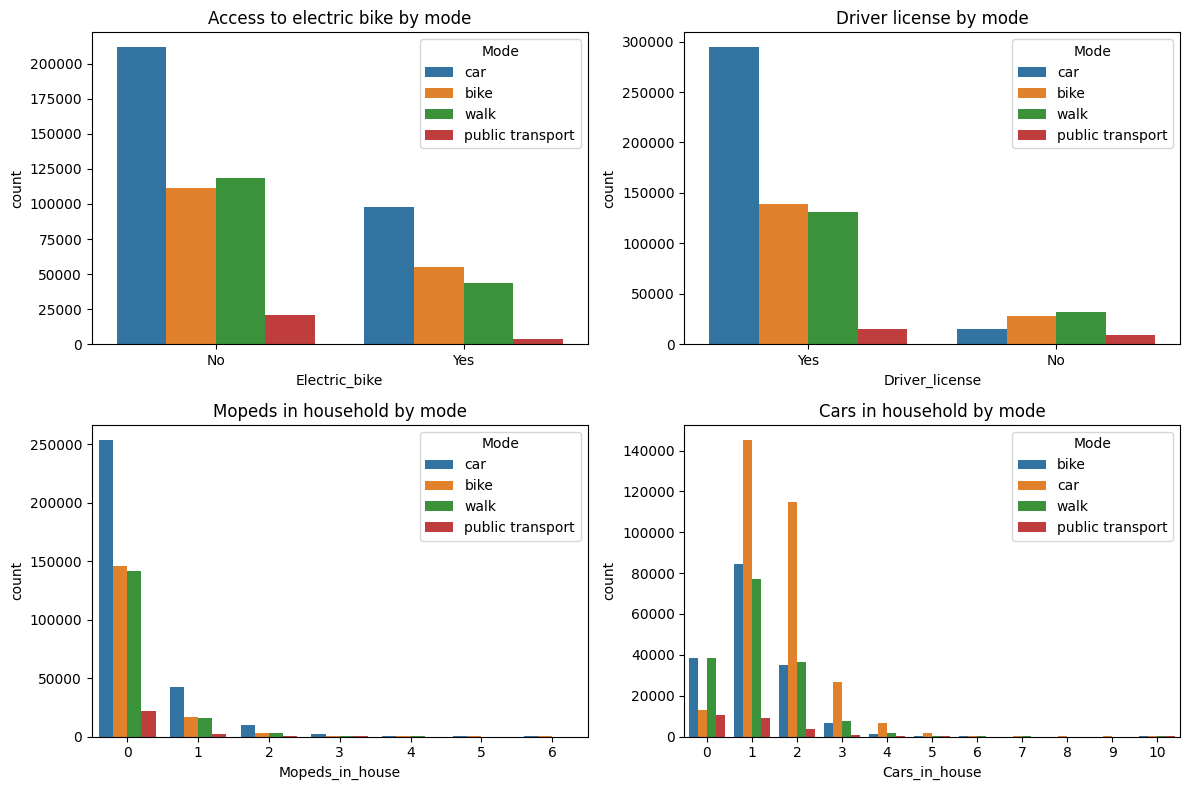

In [101]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

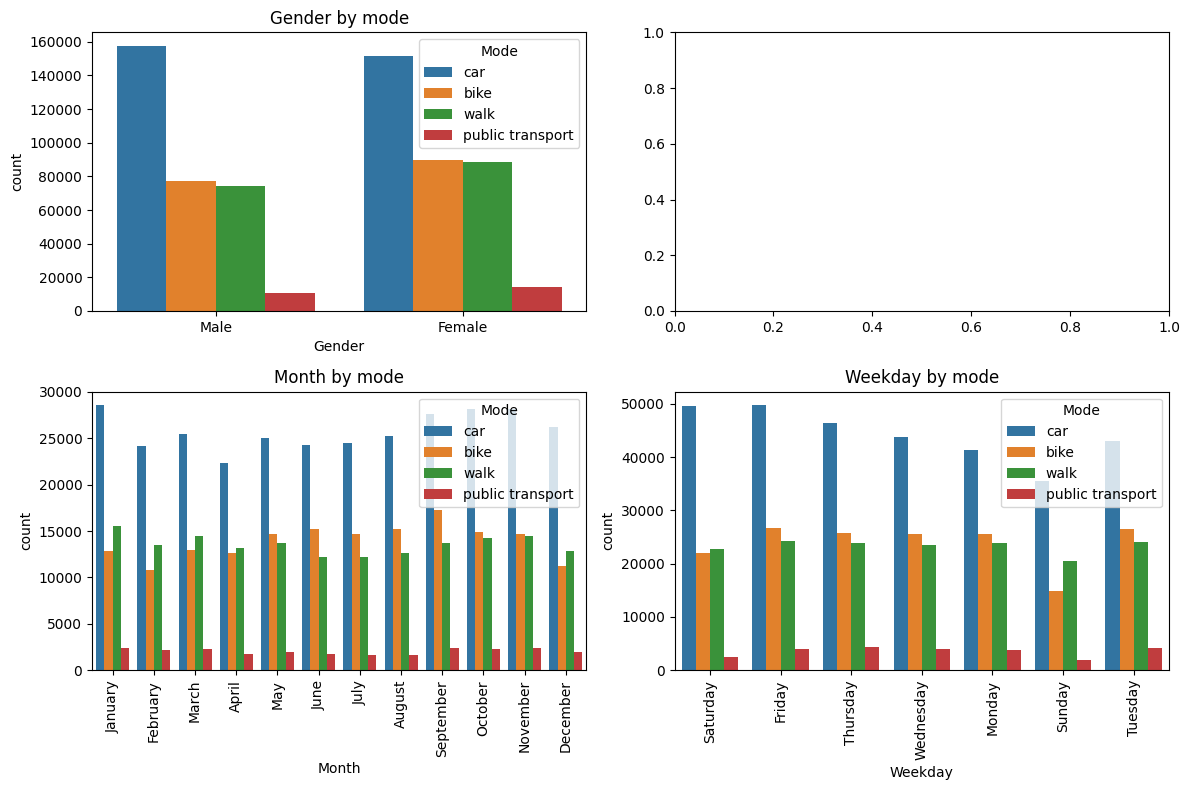

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

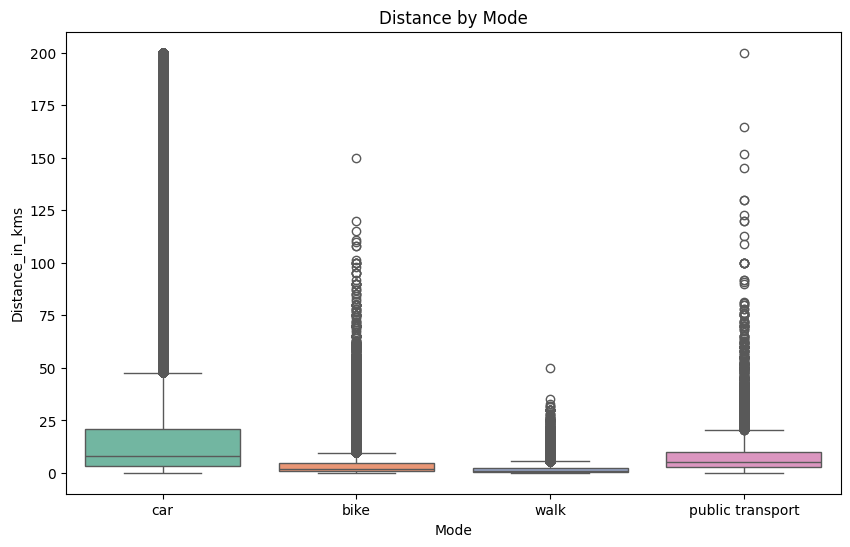

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Distance_in_kms', data=df, palette='Set2')
plt.title('Distance by Mode')
plt.show()

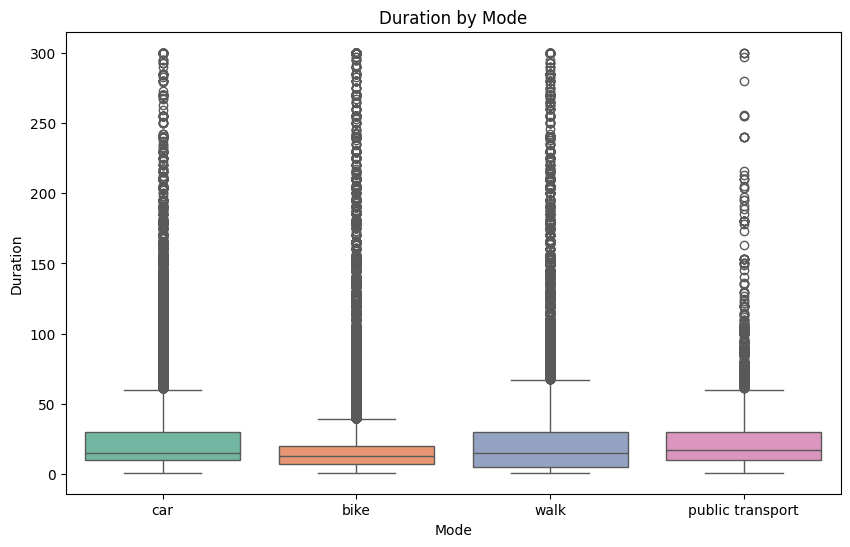

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mode', y='Duration', data=df, palette='Set2')
plt.title('Duration by Mode')
plt.show()

# DATA PREPROCESS

In [62]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Duration,Hour,Distance_in_kms
count,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000,663745.000000
mean,2.620011,47.508646,1.347947,0.199550,24.033537,13.636659,10.226983
std,1.293940,17.730048,0.984690,0.543227,28.103641,4.297903,19.631087
min,1.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.100000
25%,2.000000,32.000000,1.000000,0.000000,10.000000,10.000000,1.200000
50%,2.000000,47.000000,1.000000,0.000000,15.000000,14.000000,3.300000
75%,4.000000,61.000000,2.000000,0.000000,30.000000,17.000000,10.000000
max,10.000000,99.000000,10.000000,6.000000,300.000000,23.000000,200.000000


In [63]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.513812
Secondary            32.915352
Lower vocational     13.775170
Other education       2.340507
Primary education     1.792255
No education          0.662905
Name: proportion, dtype: float64


In [64]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other"
                }
df['Education'] = df['Education'].replace(value_mapping)

In [65]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.513812
Secondary           32.915352
Lower vocational    13.775170
Other                4.795667
Name: proportion, dtype: float64


In [66]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           21.314963
Go to/return from work     19.751561
Social and recreational    16.179105
Other motives              11.590445
Tours/hiking               11.369728
Visits                     10.200755
Service/Personal care       3.547145
Education                   3.196710
Business related            2.849588
Name: proportion, dtype: float64


In [67]:
value_mapping = {
                 "Service/Personal care":"Service/Education/Business",
                 "Education":"Service/Education/Business",
                 "Business related":"Service/Education/Business",
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [68]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery              21.314963
Go to/return from work        19.751561
Social and recreational       16.179105
Other motives                 11.590445
Tours/hiking                  11.369728
Visits                        10.200755
Service/Education/Business     9.593443
Name: proportion, dtype: float64


In [105]:
value_mapping = {0: "22.00-01.00", 
                 1: "01.00-04.00",
                 2: "01.00-04.00",
                 3: "01.00-04.00",
                 4: "04.00-07.00",
                 5: "04.00-07.00",
                 6: "04.00-07.00",
                 7: "07.00-10.00",
                 8: "07.00-10.00",
                 9: "07.00-10.00",
                 10: "10.00-13.00",
                 11: "10.00-13.00",
                 12: "10.00-13.00",
                 13: "13.00-16.00",
                 14: "13.00-16.00",
                 15: "13.00-16.00",
                 16: "16.00-19.00",
                 17: "16.00-19.00",
                 18: "16.00-19.00",
                 19: "19.00-22.00",
                 20: "19.00-22.00",
                 21: "19.00-22.00",
                 22: "22.00-01.00",
                 23: "22.00-01.00"}
df['Hour'] = df['Hour'].replace(value_mapping)

In [106]:
perc=df['Hour'].value_counts(True)*100
print(perc)

Hour
16.00-19.00    22.779381
13.00-16.00    22.134705
10.00-13.00    21.009725
07.00-10.00    17.758929
19.00-22.00    10.342225
22.00-01.00     3.539612
04.00-07.00     2.113312
01.00-04.00     0.322112
Name: proportion, dtype: float64


In [107]:
df.duplicated().sum()

31974

In [108]:
df = df.drop_duplicates()
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,Weekday,Holiday,Round_trip,Motive,Duration,Hour,Mode,Distance_in_kms
0,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,15,10.00-13.00,car,6.0
1,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Shopping/Grocery,10,10.00-13.00,car,6.0
2,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,13.00-16.00,bike,1.0
3,1,Male,42,Dutch,Secondary,Yes,1,0,No,January,Saturday,No,No,Visits,5,16.00-19.00,bike,1.0
4,2,Male,42,Dutch,Secondary,Yes,1,0,No,January,Friday,No,No,Shopping/Grocery,10,07.00-10.00,car,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Service/Education/Business,35,13.00-16.00,car,11.0
817122,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,7,16.00-19.00,walk,1.1
817123,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Shopping/Grocery,5,16.00-19.00,walk,0.6
817124,3,Female,49,Non Dutch,Higher education,Yes,1,0,No,December,Thursday,No,No,Social and recreational,15,16.00-19.00,car,6.3


In [109]:
one_hot_encoded = pd.get_dummies(df[['Motive']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

In [110]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Holiday", "Background"]
for col in features:
    df[col]=le.fit_transform(df[col])

In [111]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [112]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [113]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [114]:
value_mapping = {"01.00-04.00":1, 
                 "04.00-07.00":2, 
                 "07.00-10.00":3, 
                 "10.00-13.00":4, 
                 "13.00-16.00":5, 
                 "16.00-19.00":6, 
                 "19.00-22.00":7, 
                 "22.00-01.00":8}
df['Hour'] = df['Hour'].replace(value_mapping)

In [115]:
value_mapping = {"Other":1, "Secondary":2, "Lower vocational":3, "Higher education":4}
df['Education'] = df['Education'].replace(value_mapping)

In [116]:
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Motive_Go to/return from work,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
817122,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
817123,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
817124,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [117]:
df.duplicated().sum()

0

In [118]:
df.columns

Index(['People_in_house', 'Gender', 'Age', 'Background', 'Education',
       'Driver_license', 'Cars_in_house', 'Mopeds_in_house', 'Electric_bike',
       'Month', 'Weekday', 'Holiday', 'Round_trip', 'Motive', 'Duration',
       'Hour', 'Mode', 'Distance_in_kms', 'Motive_Go to/return from work',
       'Motive_Other motives', 'Motive_Service/Education/Business',
       'Motive_Shopping/Grocery', 'Motive_Social and recreational',
       'Motive_Tours/hiking', 'Motive_Visits'],
      dtype='object')

In [119]:
drops = ['Motive']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Month,...,Hour,Mode,Distance_in_kms,Motive_Go to/return from work,Motive_Other motives,Motive_Service/Education/Business,Motive_Shopping/Grocery,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits
0,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
1,1,1,42,0,2,1,1,0,0,1,...,4,0,6.0,0,0,0,1,0,0,0
2,1,1,42,0,2,1,1,0,0,1,...,5,1,1.0,0,0,0,0,0,0,1
3,1,1,42,0,2,1,1,0,0,1,...,6,1,1.0,0,0,0,0,0,0,1
4,2,1,42,0,2,1,1,0,0,1,...,3,0,3.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,4,1,1,0,0,12,...,5,0,11.0,0,0,1,0,0,0,0
817122,3,0,49,1,4,1,1,0,0,12,...,6,2,1.1,0,0,0,1,0,0,0
817123,3,0,49,1,4,1,1,0,0,12,...,6,2,0.6,0,0,0,1,0,0,0
817124,3,0,49,1,4,1,1,0,0,12,...,6,0,6.3,0,0,0,0,1,0,0


In [120]:
df.duplicated().sum()

0

In [121]:
df.isnull().sum()

People_in_house                      0
Gender                               0
Age                                  0
Background                           0
Education                            0
Driver_license                       0
Cars_in_house                        0
Mopeds_in_house                      0
Electric_bike                        0
Month                                0
Weekday                              0
Holiday                              0
Round_trip                           0
Duration                             0
Hour                                 0
Mode                                 0
Distance_in_kms                      0
Motive_Go to/return from work        0
Motive_Other motives                 0
Motive_Service/Education/Business    0
Motive_Shopping/Grocery              0
Motive_Social and recreational       0
Motive_Tours/hiking                  0
Motive_Visits                        0
dtype: int64

In [122]:
csv_filename = 'data.csv'
df.to_csv(csv_filename, index=False)
zip_filename = 'data.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(csv_filename)
import os
os.remove(csv_filename)